In [1]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress





In [2]:

#Reading the data through CSV files
population_df  = pd.read_csv('Resources/clean_data.csv')
population_df

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression),Population
0,0.0,Afghanistan,AFG,1990.0,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,318435.8137,12412000.0
1,1.0,Afghanistan,AFG,1991.0,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,329044.7740,13299000.0
2,2.0,Afghanistan,AFG,1992.0,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,382544.5729,14486000.0
3,3.0,Afghanistan,AFG,1993.0,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,440381.5074,15817000.0
4,4.0,Afghanistan,AFG,1994.0,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,456916.6455,17076000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8179,NaN,Yemen,YEM,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29162000.0
8180,NaN,Zambia,ZMB,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17352000.0
8181,NaN,Zambia,ZMB,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17861000.0
8182,NaN,Zimbabwe,ZWE,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14439000.0


In [3]:
#renaming the column name,removing Null values from the data and changing the type back to integers.
population_df = population_df.rename(columns={'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)': 'Prevalance-Depressive Disorders'})
population_df.dropna(axis = 0, how = 'any', inplace = True)
population_df['Year'] = population_df['Year'].astype(np.int64)
population_df['Population'] = population_df['Population'].astype(np.int64)

len(population_df["Entity"].unique())
population_df

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalance-Depressive Disorders,Population
0,0.0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,318435.8137,12412000
1,1.0,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,329044.7740,13299000
2,2.0,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,382544.5729,14486000
3,3.0,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,440381.5074,15817000
4,4.0,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,456916.6455,17076000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,6463.0,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,303564.6036,13350000
6464,6464.0,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,311665.7693,13587000
6465,6465.0,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,320638.5072,13815000
6466,6466.0,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,330437.3538,14030000


In [4]:
#sorting the datas between 2012 & 2017

clean_df = population_df.loc[ (population_df["Year"] >2012 ) & (population_df["Year"] <2018 ),["Entity","Prevalance-Depressive Disorders","Population"]] 
clean_df
list(clean_df.columns)
clean_df

,Entity,Prevalance-Depressive Disorders,Population
23,Afghanistan,852849.1158,32270000
24,Afghanistan,884404.6832,33371000
25,Afghanistan,906133.4339,34414000
26,Afghanistan,932188.7307,35383000
27,Afghanistan,967281.2032,36296000
...,...,...,...
6463,Zimbabwe,303564.6036,13350000
6464,Zimbabwe,311665.7693,13587000
6465,Zimbabwe,320638.5072,13815000
6466,Zimbabwe,330437.3538,14030000


The correlation between both factors is 1.0


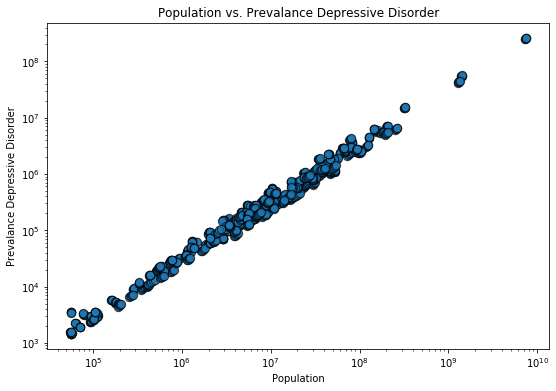

In [5]:
#converting dataframe values to list

Population_list = clean_df['Population'].values.tolist()
Prevalance_Depressive_list = clean_df['Prevalance-Depressive Disorders'].values.tolist()

#plotting the graph

fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(Population_list, Prevalance_Depressive_list, s=70, alpha=0.7, edgecolors="k")

# Set logarithmic scale on the both variables and labeling the graph

ax.set_xscale("log")
ax.set_yscale("log")
plt.title("Population vs. Prevalance Depressive Disorder")
plt.xlabel('Population')
plt.ylabel('Prevalance Depressive Disorder')

#calculating the correalation between population & prevalance disorders

correlation = st.pearsonr(Population_list,Prevalance_Depressive_list)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#saving the output to an image
plt.savefig("output_data/Fig1.png")
plt.show()

In [6]:
#Grouping the dataframe by country name and taking the mean

Prevalance_Population_df = clean_df.groupby(["Entity"],as_index=False).mean()[["Entity","Prevalance-Depressive Disorders","Population"]]
Prevalance_Population_df


,Entity,Prevalance-Depressive Disorders,Population
0,Afghanistan,9.085714e+05,3.434680e+07
1,Albania,6.922784e+04,2.892200e+06
2,Algeria,1.348311e+06,3.974640e+07
3,American Samoa,1.456955e+03,5.600000e+04
4,Andorra,3.218923e+03,7.840000e+04
...,...,...,...
191,Vietnam,2.736164e+06,9.267700e+07
192,World,2.564156e+08,7.379510e+09
193,Yemen,8.984694e+05,2.649420e+07
194,Zambia,3.991998e+05,1.588460e+07


In [7]:
#sorting the top 10 values of prevalnce disorders around the world in past 5 years

top10_Prevalance_Depressive_Disorders=Prevalance_Population_df.sort_values('Prevalance-Depressive Disorders',ascending=False).head(11)
top10_Prevalance_Depressive_Disorders=top10_Prevalance_Depressive_Disorders[(top10_Prevalance_Depressive_Disorders.Entity != "World")]

top10_Prevalance_Depressive_Disorders

,Entity,Prevalance-Depressive Disorders,Population
37,China,5.541975e+07,1.406651e+09
79,India,4.370258e+07,1.309958e+09
185,United States,1.516619e+07,3.208106e+08
25,Brazil,7.078484e+06,2.044538e+08
80,Indonesia,6.402232e+06,2.583046e+08
143,Russia,6.313553e+06,1.449560e+08
14,Bangladesh,5.822482e+06,1.562392e+08
126,Nigeria,5.513906e+06,1.812282e+08
131,Pakistan,5.272887e+06,1.995060e+08
87,Japan,4.482559e+06,1.279468e+08


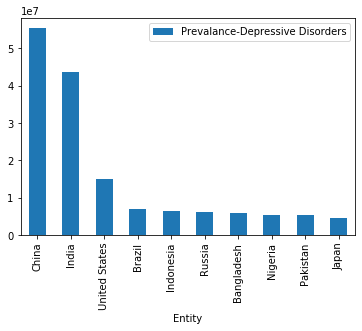

In [8]:
#plotting the graph of top 10 countries around the world with prevalance disorders

top10_Prevalance_Depressive_Disorders.plot(x="Entity",y=["Prevalance-Depressive Disorders"],kind="bar")
#plt.figure(figsize=(10,8))
plt.savefig("output_data/Fig2.png")

In [9]:
#sorting the bottom 10 values of prevalnce disorders around the world in past 5 years

bottom10_Prevalance_Depressive_Disorders=Prevalance_Population_df.sort_values('Prevalance-Depressive Disorders').head(10)
bottom10_Prevalance_Depressive_Disorders

,Entity,Prevalance-Depressive Disorders,Population
3,American Samoa,1456.955063,56000.0
109,Marshall Islands,1461.249160,57400.0
128,Northern Mariana Islands,1576.768625,55800.0
50,Dominica,1912.188384,71000.0
20,Bermuda,2210.405317,63600.0
6,Antigua and Barbuda,2383.284292,93800.0
176,Tonga,2595.561799,101400.0
113,Micronesia (country),2867.502536,108600.0
152,Seychelles,2951.201122,94800.0
91,Kiribati,3023.713453,111000.0


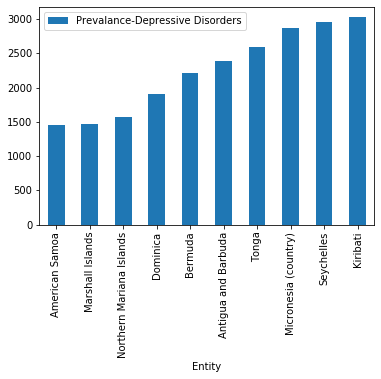

In [10]:
#plotting the graph of bottom 10 countries around the world with prevalance disorders

bottom10_Prevalance_Depressive_Disorders.plot(x="Entity",y=["Prevalance-Depressive Disorders"],kind="bar")

plt.savefig("output_data/Fig3.png")

In [11]:
#Reading the data through CSV files to do the analysis based on gender
population_gender_df  = pd.read_csv('Resources/share-with-mental-or-substance-disorders-by-sex.csv')
population_gender_df

,Entity,Code,Year,Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent),Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,17.448695,17.634233,10694804.0,NaN
2,Afghanistan,AFG,1991,17.771263,17.873184,10745168.0,NaN
3,Afghanistan,AFG,1992,18.051575,18.092318,12057436.0,NaN
4,Afghanistan,AFG,1993,18.275848,18.265196,14003764.0,NaN
...,...,...,...,...,...,...,...
59067,Zimbabwe,ZWE,2018,NaN,NaN,15052191.0,NaN
59068,Zimbabwe,ZWE,2019,NaN,NaN,15354606.0,NaN
59069,Zimbabwe,ZWE,2020,NaN,NaN,15669663.0,NaN
59070,Zimbabwe,ZWE,2021,NaN,NaN,15993525.0,NaN


In [12]:
#Cleaning the data with any null values
population_gender_df.dropna(axis = 0, how = 'any', inplace = True)
population_gender_df

,Entity,Code,Year,Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent),Population (historical estimates),Continent
26,Afghanistan,AFG,2015,16.753068,17.041232,33753500.0,Asia
620,Albania,ALB,2015,10.648345,11.058989,2882482.0,Europe
879,Algeria,DZA,2015,14.040733,14.986809,39543148.0,Africa
1138,American Samoa,ASM,2015,10.692175,11.007287,51391.0,Oceania
1280,Andorra,AND,2015,13.604457,15.850925,71766.0,Europe
...,...,...,...,...,...,...,...
57130,Venezuela,VEN,2015,11.186214,11.002820,30529722.0,South America
57389,Vietnam,VNM,2015,8.966948,10.385800,92191400.0,Asia
58192,Yemen,YEM,2015,15.410116,16.247524,28516552.0,Asia
58577,Zambia,ZMB,2015,11.994085,12.449468,16248231.0,Africa


In [13]:
#grouping the data based on continents and male -female ratios

Continent_Population_df = population_gender_df.groupby(["Continent"],as_index=True).mean()[["Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent)","Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent)","Population (historical estimates)"]]
Continent_Population_df

,Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent),Population (historical estimates)
Continent,,,
Africa,12.420521,12.617996,2.221183e+07
Asia,12.248203,12.859695,9.271324e+07
Europe,12.602931,13.933551,1.807562e+07
North America,12.998941,13.398937,2.188625e+07
Oceania,11.968171,12.474029,2.839686e+06
South America,12.794799,14.465530,3.440617e+07


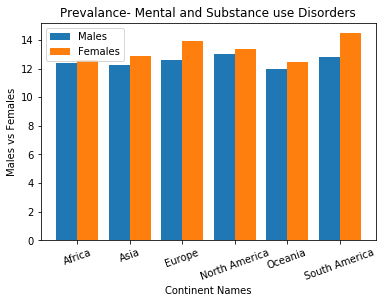

In [14]:
#plotting the multigraphs showing males and females suffering from the prevalance depressive disorders

X = ['Africa','Asia','Europe','North America','Oceania','South America']

y_values = Continent_Population_df['Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent)']
z_values = Continent_Population_df['Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent)']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y_values, 0.4, label = 'Males')
plt.bar(X_axis + 0.2, z_values, 0.4, label = 'Females')

plt.xticks(X_axis, X, rotation=20)
plt.xlabel("Continent Names")
plt.ylabel("Males vs Females")
plt.title("Prevalance- Mental and Substance use Disorders")
plt.savefig("output_data/Fig4.png")

plt.legend()
plt.show()